### Here I'm creating a Neural Network using Pytorch using class and function
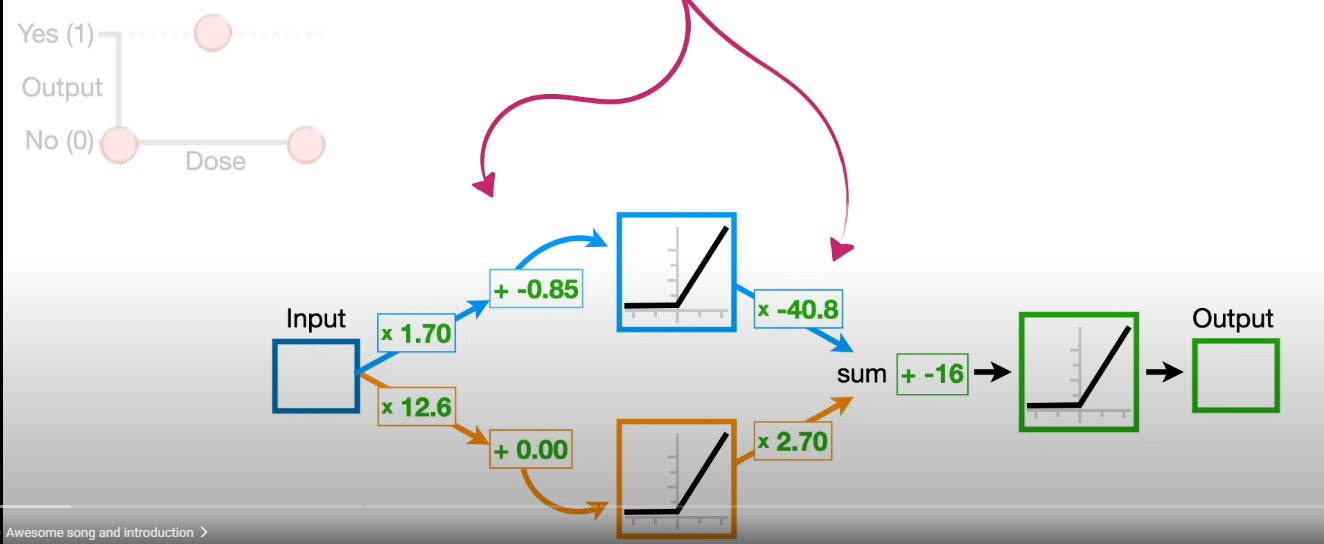

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
class BasicNN(nn.Module):

    def __init__(self):
        super().__init__()

        ## created weights and biases here

        self.w00=nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-.85), requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10=nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias=nn.Parameter(torch.tensor(-16.), requires_grad=False)


        ## needed forward pass for input to output
    def forward(self, input):

        ip_top_relu=input*self.w00 + self.b00
        top_relu_op =F.relu(ip_top_relu)
        scaled_top_relu_op = top_relu_op*self.w01

        ip_bottom_relu=input*self.w10 + self.b10
        bottom_relu_op =F.relu(ip_bottom_relu)
        scaled_bottom_relu_op = bottom_relu_op*self.w11

        ip_to_final_relu= scaled_top_relu_op + scaled_bottom_relu_op + self.final_bias

        output=F.relu(ip_to_final_relu)

        return output





In [23]:
ip_doses = torch.linspace(start=0, end=1, steps=11)

print(ip_doses)



tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


Text(0.5, 0, 'Dose')

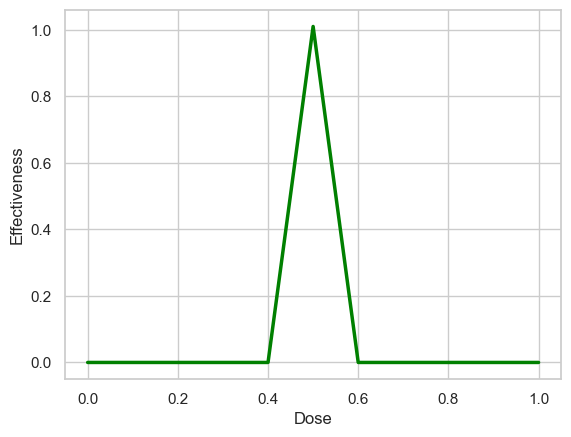

In [24]:
model=BasicNN()

output_values= model(ip_doses)

print(output_values)

sns.set_theme(style="whitegrid")

sns.lineplot(x=ip_doses, y=output_values, color='green', linewidth = 2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')


tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)


Text(0.5, 0, 'Dose')

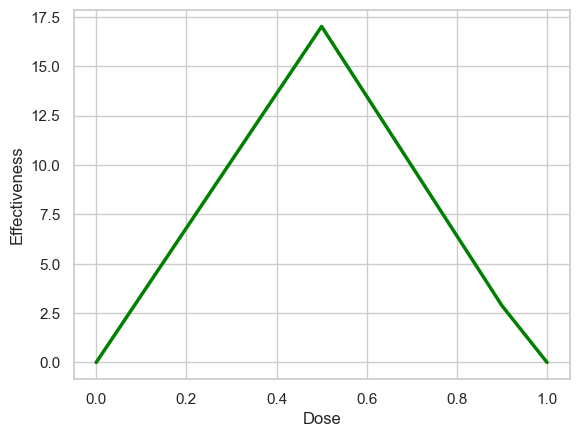

In [25]:
## Backpropagation

# optimal value of bfinal not known and do backprop to find  the value 

class BasicNN_train(nn.Module):

    def __init__(self):
        super().__init__()

        ## created weights and biases here

        self.w00=nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-.85), requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10=nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias=nn.Parameter(torch.tensor(0.0), requires_grad=True) ## when backprop happens, PyTorch computes ∂Loss/∂final_bias


        ## needed forward pass for input to output
    def forward(self, input):

        ip_top_relu=input*self.w00 + self.b00
        top_relu_op =F.relu(ip_top_relu)
        scaled_top_relu_op = top_relu_op*self.w01

        ip_bottom_relu=input*self.w10 + self.b10
        bottom_relu_op =F.relu(ip_bottom_relu)
        scaled_bottom_relu_op = bottom_relu_op*self.w11

        ip_to_final_relu= scaled_top_relu_op + scaled_bottom_relu_op + self.final_bias

        output=F.relu(ip_to_final_relu)

        return output




model=BasicNN_train()

output_values= model(ip_doses)

print(output_values)

sns.set_theme(style="whitegrid")

sns.lineplot(x=ip_doses, y=output_values.detach(), color='green', linewidth = 2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## wrong estimation at .5 



In [26]:
inputs=torch.tensor([0, 0.5, 1])
labels=torch.tensor([0, 1, 0])

optimizer=SGD(model.parameters(), lr=0.1)  ## optimize which are grad is true

print("Final_bias "+ str(model.final_bias.data))

Final_bias tensor(0.)


In [27]:
for epoch in range(100):
    total_loss =0

    for iteration in range(len(inputs)):

        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i) ## output from model 
        loss = (output_i - label_i)**2 ## loss function MSE

        loss.backward() ## d(Loss**2)/dbfinal ## it will add with the previous derivative of the input

        total_loss += float(loss)
    
    if(total_loss<0.0001):
        print("Num steps:"+ str(epoch))
        break

    optimizer.step() ## next step will be to put in correct direction
    optimizer.zero_grad() ## remove the derivative inside the model so that new derivative will store in new epoch otherwise all derivative will add up

    print("Step:"+ str(epoch)+"Final Bias: " + str(model.final_bias.data)+ "\n")




Step:0Final Bias: tensor(-3.2020)

Step:1Final Bias: tensor(-5.7636)

Step:2Final Bias: tensor(-7.8129)

Step:3Final Bias: tensor(-9.4523)

Step:4Final Bias: tensor(-10.7638)

Step:5Final Bias: tensor(-11.8131)

Step:6Final Bias: tensor(-12.6525)

Step:7Final Bias: tensor(-13.3240)

Step:8Final Bias: tensor(-13.8612)

Step:9Final Bias: tensor(-14.2909)

Step:10Final Bias: tensor(-14.6348)

Step:11Final Bias: tensor(-14.9098)

Step:12Final Bias: tensor(-15.1298)

Step:13Final Bias: tensor(-15.3059)

Step:14Final Bias: tensor(-15.4467)

Step:15Final Bias: tensor(-15.5594)

Step:16Final Bias: tensor(-15.6495)

Step:17Final Bias: tensor(-15.7216)

Step:18Final Bias: tensor(-15.7793)

Step:19Final Bias: tensor(-15.8254)

Step:20Final Bias: tensor(-15.8623)

Step:21Final Bias: tensor(-15.8919)

Step:22Final Bias: tensor(-15.9155)

Step:23Final Bias: tensor(-15.9344)

Step:24Final Bias: tensor(-15.9495)

Step:25Final Bias: tensor(-15.9616)

Step:26Final Bias: tensor(-15.9713)

Step:27Final Bi

In [ ]:
print("Final Bias after optimization"+ str(model.final_bias.data))



Final Bias after optimizationtensor(-16.0019)
